<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Tejas/Deep_Learning_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Discussed with : Ramki Ramamurthy and Sushant Kotwal

References:</br>
1.https://www.tensorflow.org/tutorials/quickstart/beginner </br>
2.https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/</br>
3.https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/</br>
4.https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin</br>
5.https://www.machinelearningplus.com/plots/subplots-python-matplotlib/#:~:text=Subplots%20mean%20a%20group%20of,canvas%20that%20holds%20multiple%20plots. </br>
6.https://numpy.org/doc/stable/reference/generated/numpy.argsort.html </br>
7.https://www.tensorflow.org/guide/keras/sequential_model 
</br>
8 https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer </br>
9 https://www.kaggle.com/code/anasmjali/dimensionality-reduction-pca-and-tsne

In [3]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline  

Found GPU at: /device:GPU:0


In [4]:

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


#Code to check connection and usage of GPU

In [5]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.957215664000003
GPU (s):
0.039362590999999725
GPU speedup over CPU: 75x


# Build Network  
##Q1.1

In [6]:

# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# Lets see the shapes of each Data sets
print("TRAIN SET:")
print("Training Set X_train shape is : {}".format(X_train.shape))
print("Training Set y_train shape is : {}".format(y_train.shape))
print("____"*25)
print("TEST SET:")
print("Test Set X_test shape is : {}".format(X_test.shape))
print("Test Set y_test shape is : {}".format(y_test.shape))

TRAIN SET:
Training Set X_train shape is : (60000, 28, 28)
Training Set y_train shape is : (60000,)
____________________________________________________________________________________________________
TEST SET:
Test Set X_test shape is : (10000, 28, 28)
Test Set y_test shape is : (10000,)


5


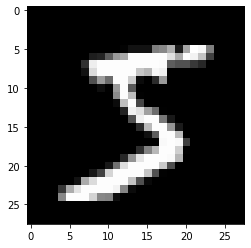

In [8]:
print(y_train[0])

# Lets its print an image
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

# So y_train has the label and X_train has its vectorial representation

##Library for Model Definition

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:

model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28,28)),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer1"),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer2"),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer3"),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer4"),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer5"),
    tf.keras.layers.Dense(units=10,activation='softmax')
  ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 target_layer1 (Dense)       (None, 1024)              803840    
                                                                 
 target_layer2 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer3 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer4 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer5 (Dense)       (None, 1024)              1049600   
                                                                 
 dense (Dense)               (None, 10)                1

Check:
param_number = output_channel_number * (input_channel_number + 1)

Dense layer 1 = 1024 * [784 + 1] = 803840 

Dense layer 2 = 1024*1025 = 1049600

Intuition is that its the connections ( Weights ) between the two layers that are to be trained.

I used Relu cause it adds sparsity and also reduces vanishing gradients. Relu will straightaway remove a few features that are not useful. This I feel helps in many ways like reducing training time, reducing features considered ( more sparse ).

In [12]:

model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs = 30, batch_size = 256 )

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


235/235 [==============================] - 2s 5ms/step - loss: 2.8090 - accuracy: 0.8777
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1050 - accuracy: 0.9680
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0721 - accuracy: 0.9776
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0547 - accuracy: 0.9828
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0432 - accuracy: 0.9865
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0375 - accuracy: 0.9884
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0419 - accuracy: 0.9871
Epoch 9/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 10/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0341 - accuracy: 0.9899
Epoch 11/3

In [14]:
accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1319 - accuracy: 0.9784


In [15]:
print("The Accuracy of the Model is {}".format(accuracy[-1]))

The Accuracy of the Model is 0.9783999919891357


In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred.shape


(10000, 10)

Lets take First Output of the y_pred and lets plot its image and highest prediction and check if its right

In [18]:
y_pred[1]

array([9.3958048e-18, 9.1699209e-12, 1.0000000e+00, 4.8363856e-12,
       7.8270496e-17, 3.4341021e-18, 4.0905616e-18, 2.9321211e-14,
       3.3196128e-15, 1.0009042e-23], dtype=float32)

As we can see index 3 is highest (aka label 2)
</br>
Now lets plot its image

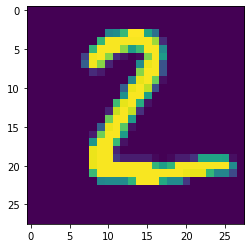

In [19]:
plt.imshow(X_test[1])


In [20]:
print(y_pred[1].argmax())


2


In [21]:
type(y_pred)

numpy.ndarray

## 1.3

Index of the chosen values ( agrsort on columns ( col is the label )
[380 192  71 188 804 597 407 592 644 101]
[826 191 835 836 189 652 416 180 831 430]
[728 888 731 331 738 741 744 318 875 285]
[780 313 782  87  90 590 500 687 574 912]
[475 748 660 668 931  85 360 670 532 109]
[869 127 129 866 694 132 412 347 935 618]
[973  11  91 860 559 814 201 197 769  88]
[930 825 262 510 263 832  97 917  83   0]
[355 520 128 134 146 914 693 486 563 805]
[235 113 454 118 434 913 426 422 471 999]
____________________________________________________________________________________________________
Plots : 




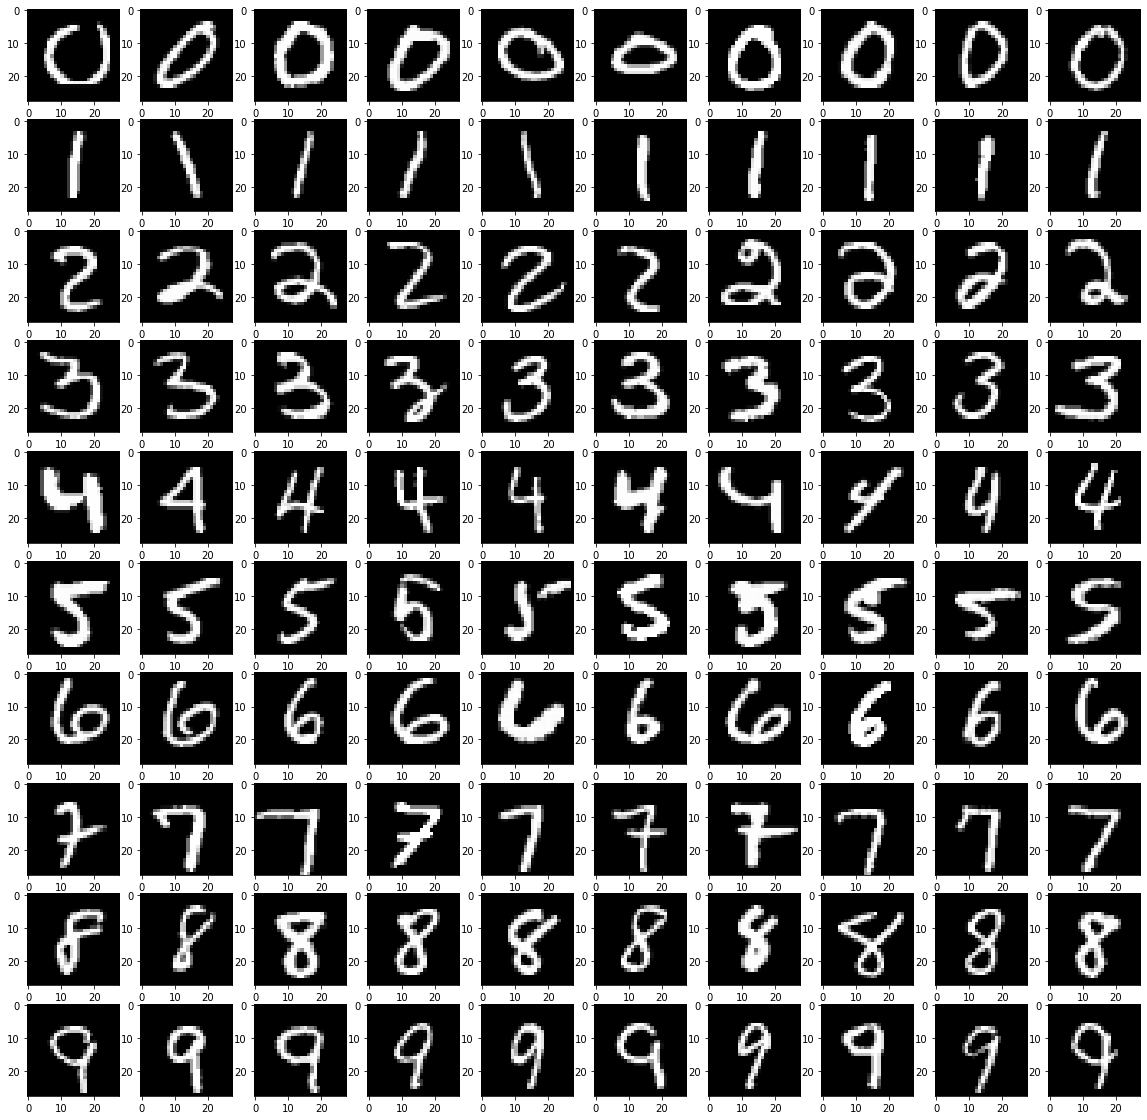

In [22]:
plt.rcParams['figure.figsize'] = (20,20) # Globally set the figure size
fig, axs = plt.subplots(10, 10)
y_pred_1000 = y_pred[:1000]
#range fxn starts from 0 
print("Index of the chosen values ( agrsort on columns ( col is the label )")
for i in range(10):
  chosen = y_pred_1000[:,i].argsort()[-10:][::1]
  print(chosen)
  for j in range(10):
    axs[i,j].imshow(X_test[chosen[j]], cmap=plt.get_cmap('gray'))

print("____"*25)
print("Plots : \n\n")
plt.show()

##1.4

In [23]:
y_pred_hlast = model.layers[-2].output
print(y_pred)

[[9.6390899e-16 1.4268067e-10 1.5192009e-11 ... 1.0000000e+00
  1.8623818e-16 1.7930470e-10]
 [9.3958048e-18 9.1699209e-12 1.0000000e+00 ... 2.9321211e-14
  3.3196128e-15 1.0009042e-23]
 [1.0280196e-14 1.0000000e+00 3.7796243e-14 ... 3.7476877e-10
  4.6508140e-12 2.3416602e-16]
 ...
 [5.2601036e-26 1.3543282e-17 2.5951877e-23 ... 5.6792256e-18
  1.8998927e-20 2.0813516e-14]
 [3.3164097e-23 8.3299859e-22 1.2729180e-19 ... 2.0907889e-22
  8.5171065e-11 2.0697255e-17]
 [2.0112856e-13 1.2825768e-06 1.4435766e-14 ... 6.8508592e-19
  9.2905549e-16 2.1956538e-20]]


In [24]:
y_pred_hlast.shape

TensorShape([None, 1024])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 target_layer1 (Dense)       (None, 1024)              803840    
                                                                 
 target_layer2 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer3 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer4 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer5 (Dense)       (None, 1024)              1049600   
                                                                 
 dense (Dense)               (None, 10)                1

In [26]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="target_layer5").output,
)

features = feature_extractor(X_test[:10000])



In [27]:
features.shape

TensorShape([10000, 1024])

In [28]:
type(features)

tensorflow.python.framework.ops.EagerTensor

In [29]:
features1 = np.array(features)

In [30]:

np_features = tf.nn.softmax(features1[np.random.choice(a=range(10000),size=1000,replace=False),:][:,np.random.choice(a=range(1024),size=10,replace=False)]).numpy().argmax(axis=1)


In [31]:
np_features

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       7, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       7, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [32]:
np_features.shape

(1000,)

In [33]:
np_features

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       7, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       7, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

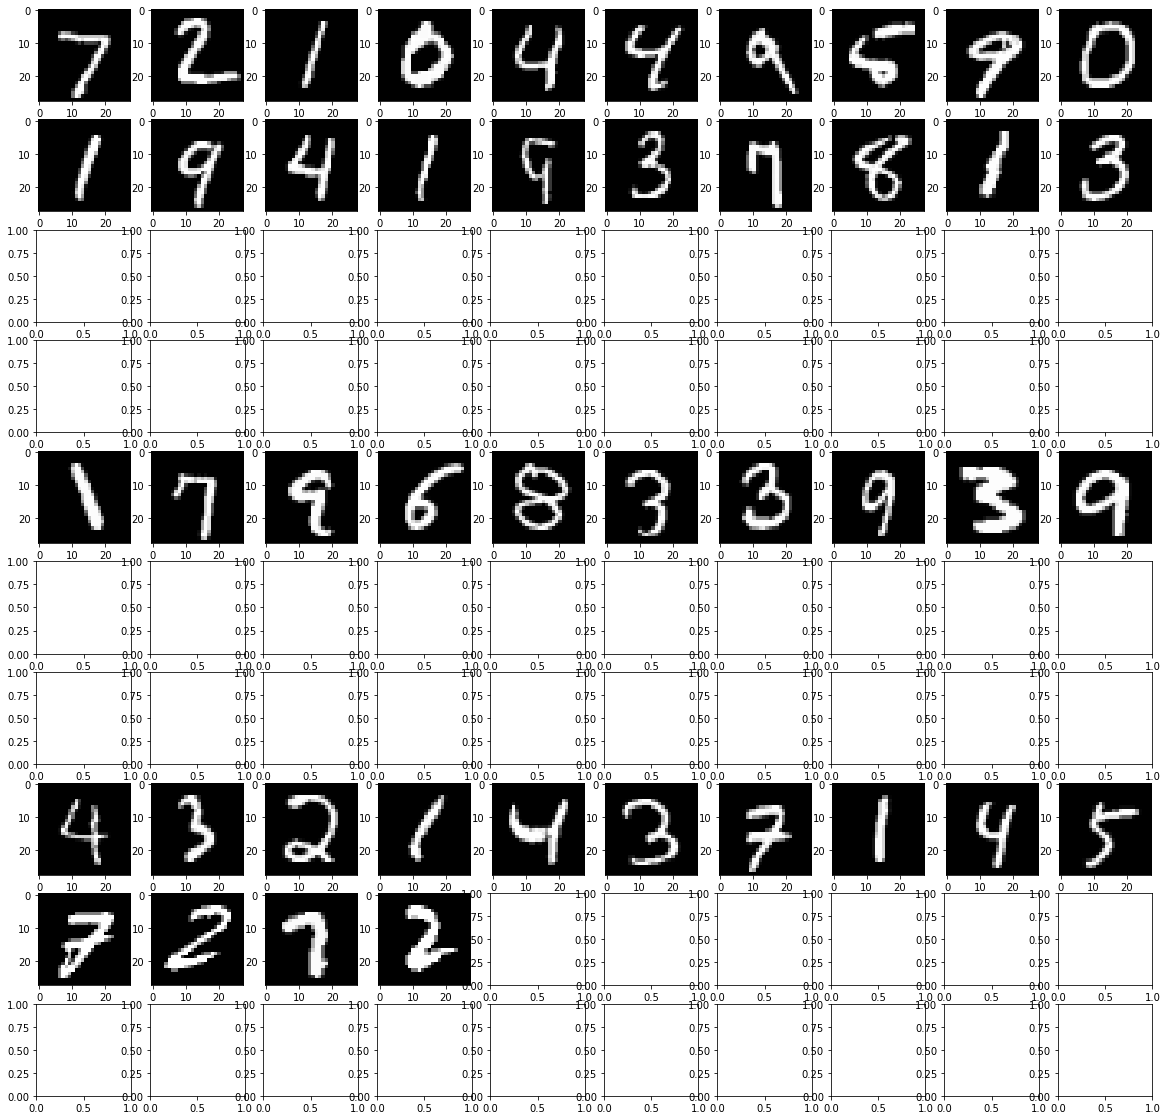

In [34]:
plt.rcParams['figure.figsize'] = (20,20) # Globally set the figure size
fig, axs = plt.subplots(10, 10)
for i in range(10):  
    result = np.where(np_features==i)[0][:10]
    for j in range(10):
      try:
          axs[i,j].imshow(X_test[result[j]], cmap=plt.get_cmap('gray'))
      except:
          continue
plt.show()


Basically out of 1024 features we ransomly took 10 feaures without any weight assigned. Now we plot these features. Since we skipped the entire feature mapping step ( feature transformation to feature reduction done in last layer ) </br>
we just pass our outputs to softmax and map it using a rudimentary logic that our randomly chosen features accurately tell us the label when put together.

##1.5 TSNE and PCA

In [38]:
from keras.models import Model

Get the output of the layer and plot so see the seperation

### Layer 1 TSNE & PCA

The code below generates an model from our existing model with the layers we desire and gives the output out too. Output is not an tensor.

In [40]:
#see #ef 8
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer("target_layer1").output)
intermediate_output = intermediate_layer_model.predict(X_test[:1000])

In [41]:
intermediate_output.shape 

(1000, 1024)

In [75]:
type(intermediate_output)

numpy.ndarray

In [59]:
input = X_test[:1000] 
output = y_test[:1000]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

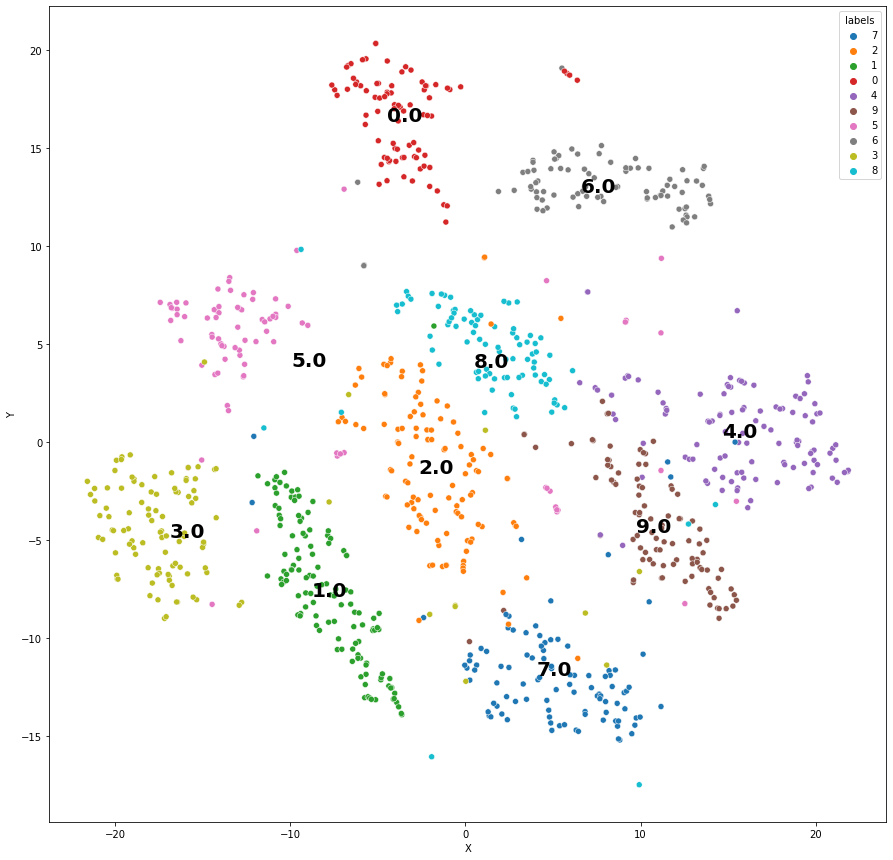

In [62]:
# see ref 9 
#Applying TSNE transformation
data_tsne = TSNE(n_components=2, n_iter=300)
tsne = data_tsne.fit_transform(intermediate_output) # Fit the model on this output
df_tsne = pd.DataFrame(tsne,columns=['X','Y'])
df_tsne["labels"] = output
df_tsne["labels"] = df_tsne["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_tsne.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers = centers.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=df_tsne,palette=sns.color_palette())
values = centers.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

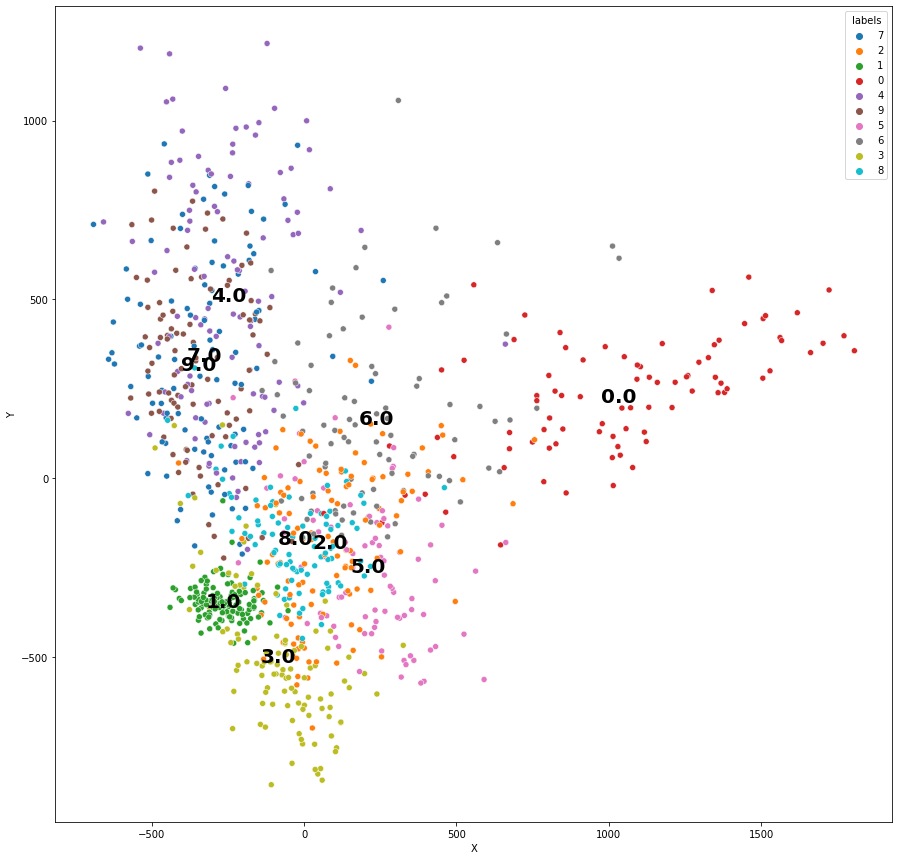

In [61]:
# see ref 9
#Applying pca transformation
data_pca = PCA(n_components=2)
pca = data_pca.fit_transform(intermediate_output) # Fit the model on this output

df_pca = pd.DataFrame(pca,columns=["X","Y"])
df_pca["labels"] = output
df_pca["labels"] = df_pca["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_pca.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=df_pca,palette=sns.color_palette())
values = centers.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

### Layer 2 TSNE & PCA

In [63]:
#see #ef 8
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer("target_layer2").output)
intermediate_output = intermediate_layer_model.predict(X_test[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

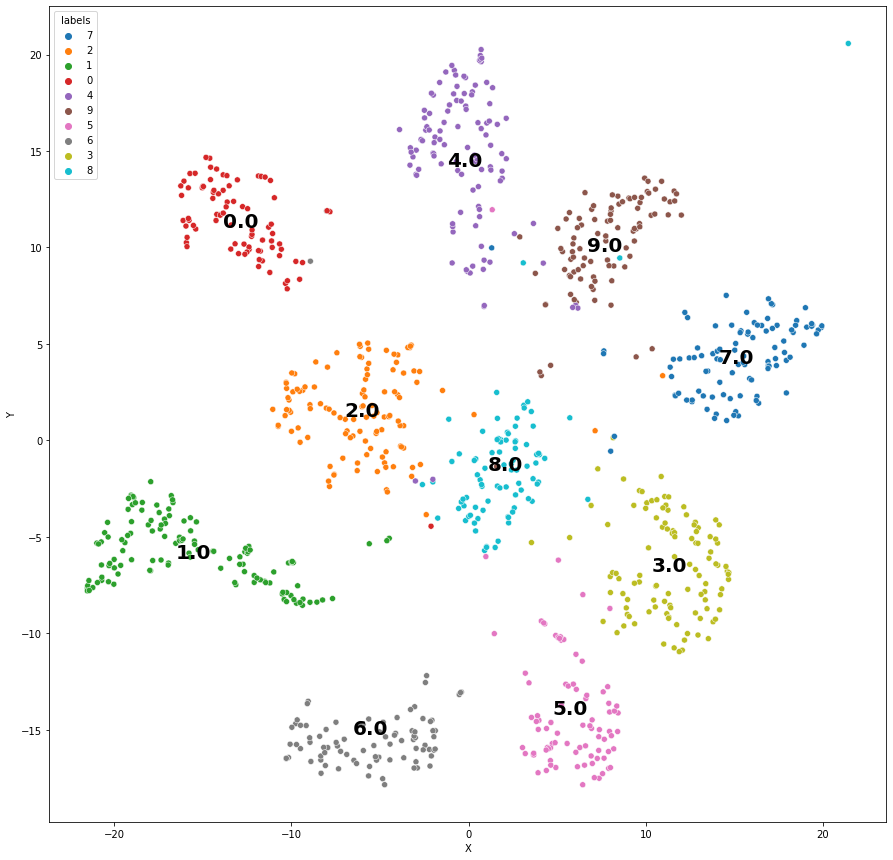

In [64]:
# see ref 9 
#Applying TSNE transformation
data_tsne = TSNE(n_components=2, n_iter=300)
tsne = data_tsne.fit_transform(intermediate_output) # Fit the model on this output
df_tsne = pd.DataFrame(tsne,columns=['X','Y'])
df_tsne["labels"] = output
df_tsne["labels"] = df_tsne["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_tsne.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers = centers.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=df_tsne,palette=sns.color_palette())
values = centers.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

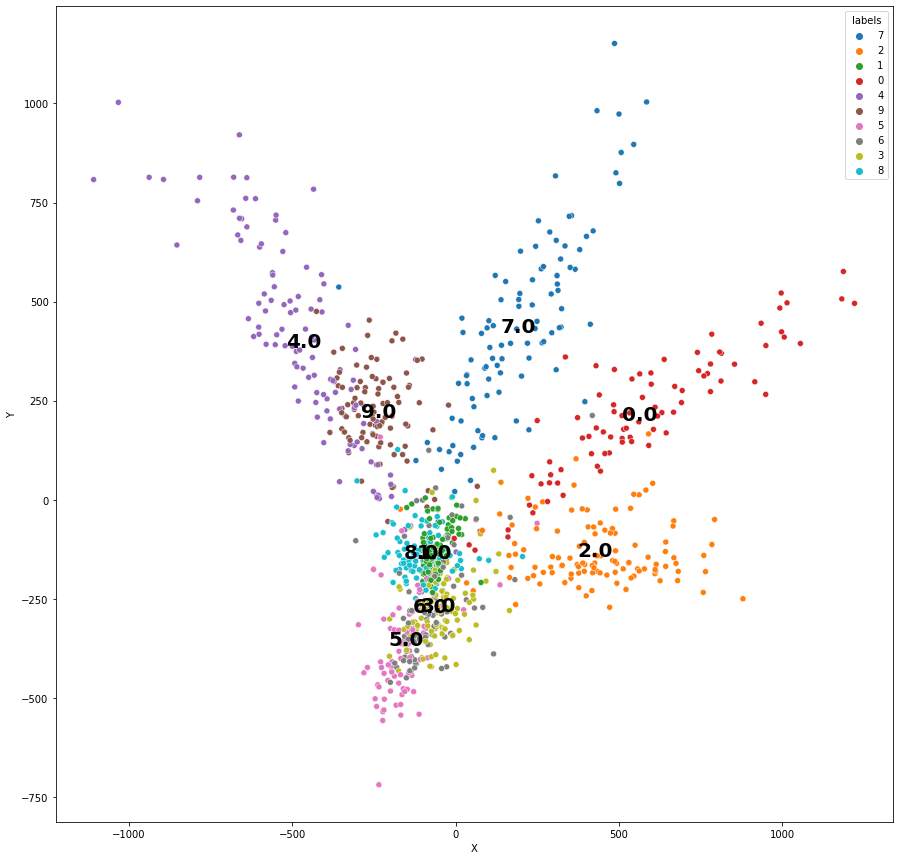

In [65]:
# see ref 9
#Applying pca transformation
data_pca = PCA(n_components=2)
pca = data_pca.fit_transform(intermediate_output) # Fit the model on this output

df_pca = pd.DataFrame(pca,columns=["X","Y"])
df_pca["labels"] = output
df_pca["labels"] = df_pca["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_pca.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=df_pca,palette=sns.color_palette())
values = centers.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

### Layer 3 TSNE & PCA

In [66]:
#see #ef 8
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer("target_layer3").output)
intermediate_output = intermediate_layer_model.predict(X_test[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

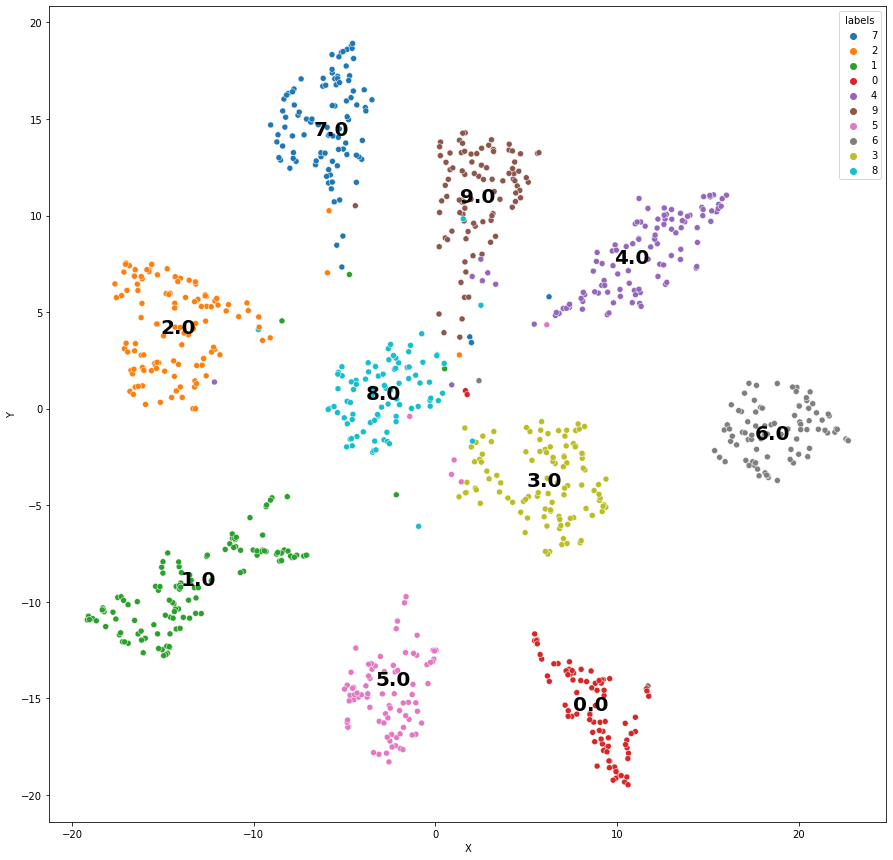

In [67]:
# see ref 9 
#Applying TSNE transformation
data_tsne = TSNE(n_components=2, n_iter=300)
tsne = data_tsne.fit_transform(intermediate_output) # Fit the model on this output
df_tsne = pd.DataFrame(tsne,columns=['X','Y'])
df_tsne["labels"] = output
df_tsne["labels"] = df_tsne["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_tsne.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers = centers.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=df_tsne,palette=sns.color_palette())
values = centers.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

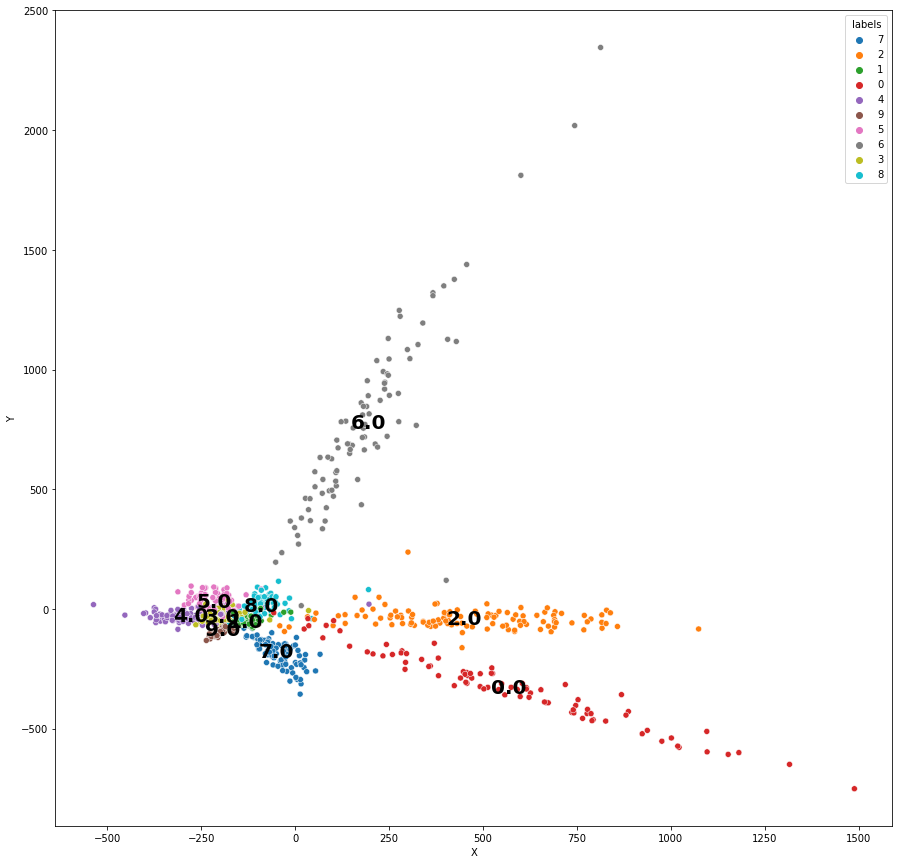

In [68]:
# see ref 9
#Applying pca transformation
data_pca = PCA(n_components=2)
pca = data_pca.fit_transform(intermediate_output) # Fit the model on this output

df_pca = pd.DataFrame(pca,columns=["X","Y"])
df_pca["labels"] = output
df_pca["labels"] = df_pca["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_pca.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=df_pca,palette=sns.color_palette())
values = centers.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

### Layers 4 TSNE & PCA

In [69]:
#see #ef 8
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer("target_layer4").output)
intermediate_output = intermediate_layer_model.predict(X_test[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

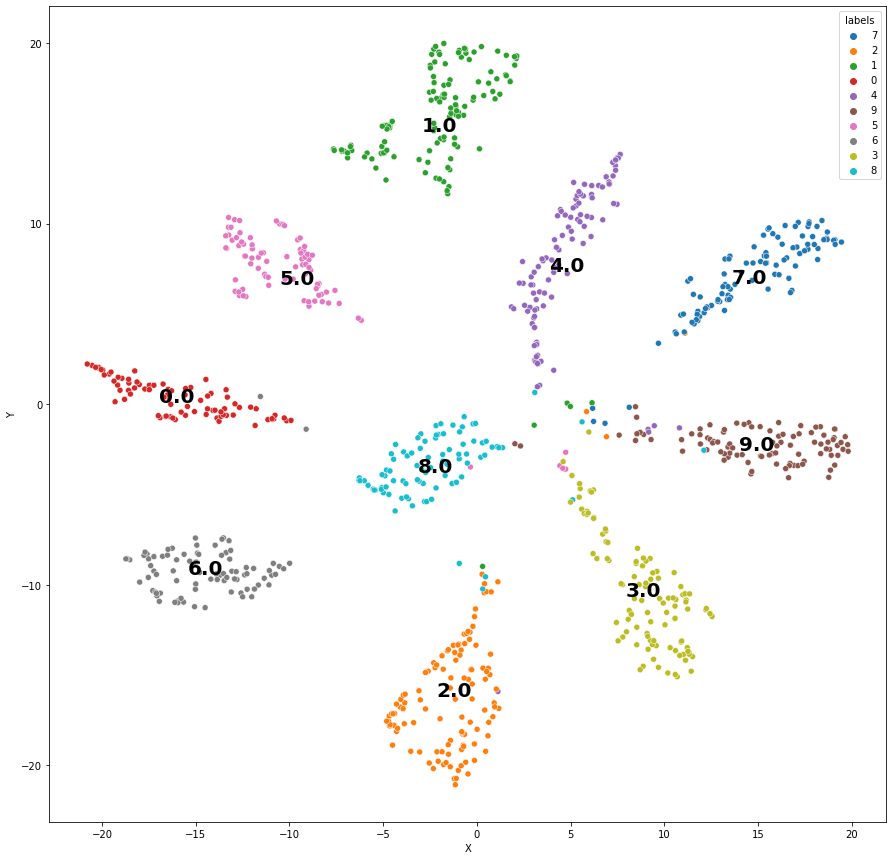

In [70]:
# see ref 9 
#Applying TSNE transformation
data_tsne = TSNE(n_components=2, n_iter=300)
tsne = data_tsne.fit_transform(intermediate_output) # Fit the model on this output
df_tsne = pd.DataFrame(tsne,columns=['X','Y'])
df_tsne["labels"] = output
df_tsne["labels"] = df_tsne["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_tsne.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers = centers.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=df_tsne,palette=sns.color_palette())
values = centers.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

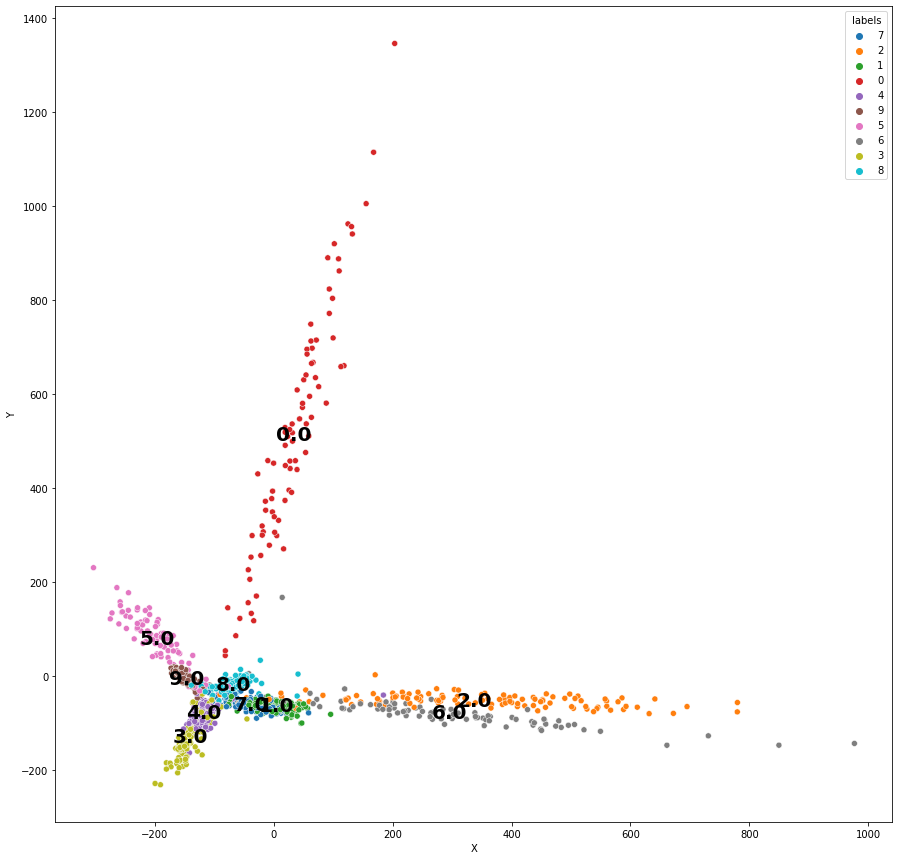

In [71]:
# see ref 9
#Applying pca transformation
data_pca = PCA(n_components=2)
pca = data_pca.fit_transform(intermediate_output) # Fit the model on this output

df_pca = pd.DataFrame(pca,columns=["X","Y"])
df_pca["labels"] = output
df_pca["labels"] = df_pca["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_pca.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=df_pca,palette=sns.color_palette())
values = centers.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

### Layers 5 TSNE & PCA

In [72]:
#see #ef 8
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer("target_layer5").output)
intermediate_output = intermediate_layer_model.predict(X_test[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

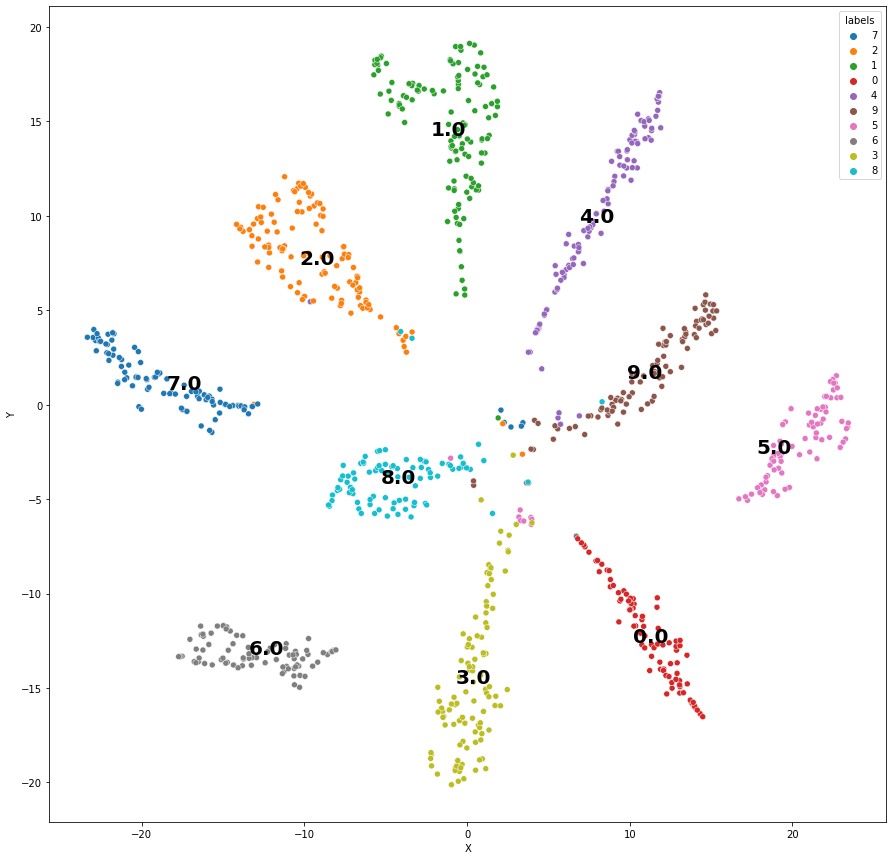

In [73]:
# see ref 9 
#Applying TSNE transformation
data_tsne = TSNE(n_components=2, n_iter=300)
tsne = data_tsne.fit_transform(intermediate_output) # Fit the model on this output
df_tsne = pd.DataFrame(tsne,columns=['X','Y'])
df_tsne["labels"] = output
df_tsne["labels"] = df_tsne["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_tsne.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers = centers.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=df_tsne,palette=sns.color_palette())
values = centers.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

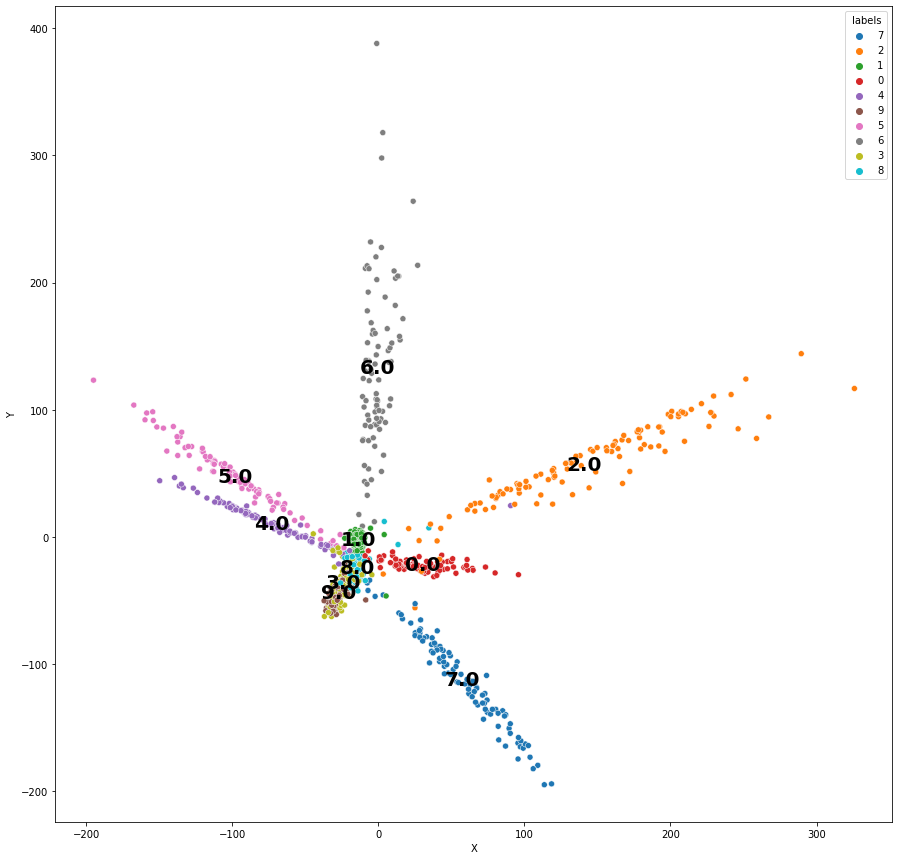

In [74]:
# see ref 9
#Applying pca transformation
data_pca = PCA(n_components=2)
pca = data_pca.fit_transform(intermediate_output) # Fit the model on this output

df_pca = pd.DataFrame(pca,columns=["X","Y"])
df_pca["labels"] = output
df_pca["labels"] = df_pca["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centers = df_pca.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centers["labels"] = centers["labels"].apply(lambda x:int(x))
centers.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (15,15)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=df_pca,palette=sns.color_palette())
values = centers.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

From the TSNE and PCA we can observe two things. The input undergoes huge feature transformation in each hidden layer. In the sence the seperation is increasing more and more. 

Yet we can easily note that TSNE is better than PCA as its non linear dimensionality reduction. It seems that our image is not very linearly seperable.

It makes sense as our data is an image of numbers.